In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_3.csv')
df.head()

,RespondentID,Age,Gender,Education,Income_TRY,Working_Status,Driver_License,Car_Ownership,Residence_Center,Travel_Time_A_min,Travel_Cost_A_TRY,Parking_Available,Travel_Time_B_min,Travel_Cost_B_TRY,Comfort_B_1to5,Wait_B_min,Transfer_B,Time_Diff_A_B,Choice_A
0,1,18,0,Elementary,40014,FullTime,1,0,1,50,79,1,30,45,5,0,2,20,0
1,2,69,1,Primary,41301,FullTime,1,0,1,33,13,0,15,27,4,16,0,18,0
2,3,32,0,HighSchool,20254,Student,0,0,1,10,15,0,31,22,2,1,0,-21,1
3,4,68,1,Primary,84270,Student,1,1,1,51,36,0,28,44,4,15,1,23,0
4,5,68,0,Elementary,85043,Retired,1,0,0,10,66,0,59,33,5,6,1,-49,1


Mode A= Car Mode B=PT

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RespondentID       403 non-null    int64 
 1   Age                403 non-null    int64 
 2   Gender             403 non-null    int64 
 3   Education          403 non-null    object
 4   Income_TRY         403 non-null    int64 
 5   Working_Status     403 non-null    object
 6   Driver_License     403 non-null    int64 
 7   Car_Ownership      403 non-null    int64 
 8   Residence_Center   403 non-null    int64 
 9   Travel_Time_A_min  403 non-null    int64 
 10  Travel_Cost_A_TRY  403 non-null    int64 
 11  Parking_Available  403 non-null    int64 
 12  Travel_Time_B_min  403 non-null    int64 
 13  Travel_Cost_B_TRY  403 non-null    int64 
 14  Comfort_B_1to5     403 non-null    int64 
 15  Wait_B_min         403 non-null    int64 
 16  Transfer_B         403 non-null    int64 
 1

In [ ]:
from google.colab import files
df.describe()
df.describe(include="all")


total 16K
-rw-r--r-- 1 root root 6.3K Dec 24 18:14 describe_summary.xlsx
drwx------ 5 root root 4.0K Dec 24 17:02 drive
drwxr-xr-x 1 root root 4.0K Dec 11 14:34 sample_data


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Income std deviation indicated high dispersion in the dataset.Therefore in the feature engineering part the income categoriation will be made based on the std and mean of the variable.

In [ ]:
df.nunique()

,0
RespondentID,403
Age,52
Gender,2
Education,4
Income_TRY,401
Working_Status,4
Driver_License,2
Car_Ownership,2
Residence_Center,2
Travel_Time_A_min,55


Gender, Driver_License, Car_Ownership, Residence_Center, Parking_Available are binary. Education, Working Status can be categorical

<Axes: >

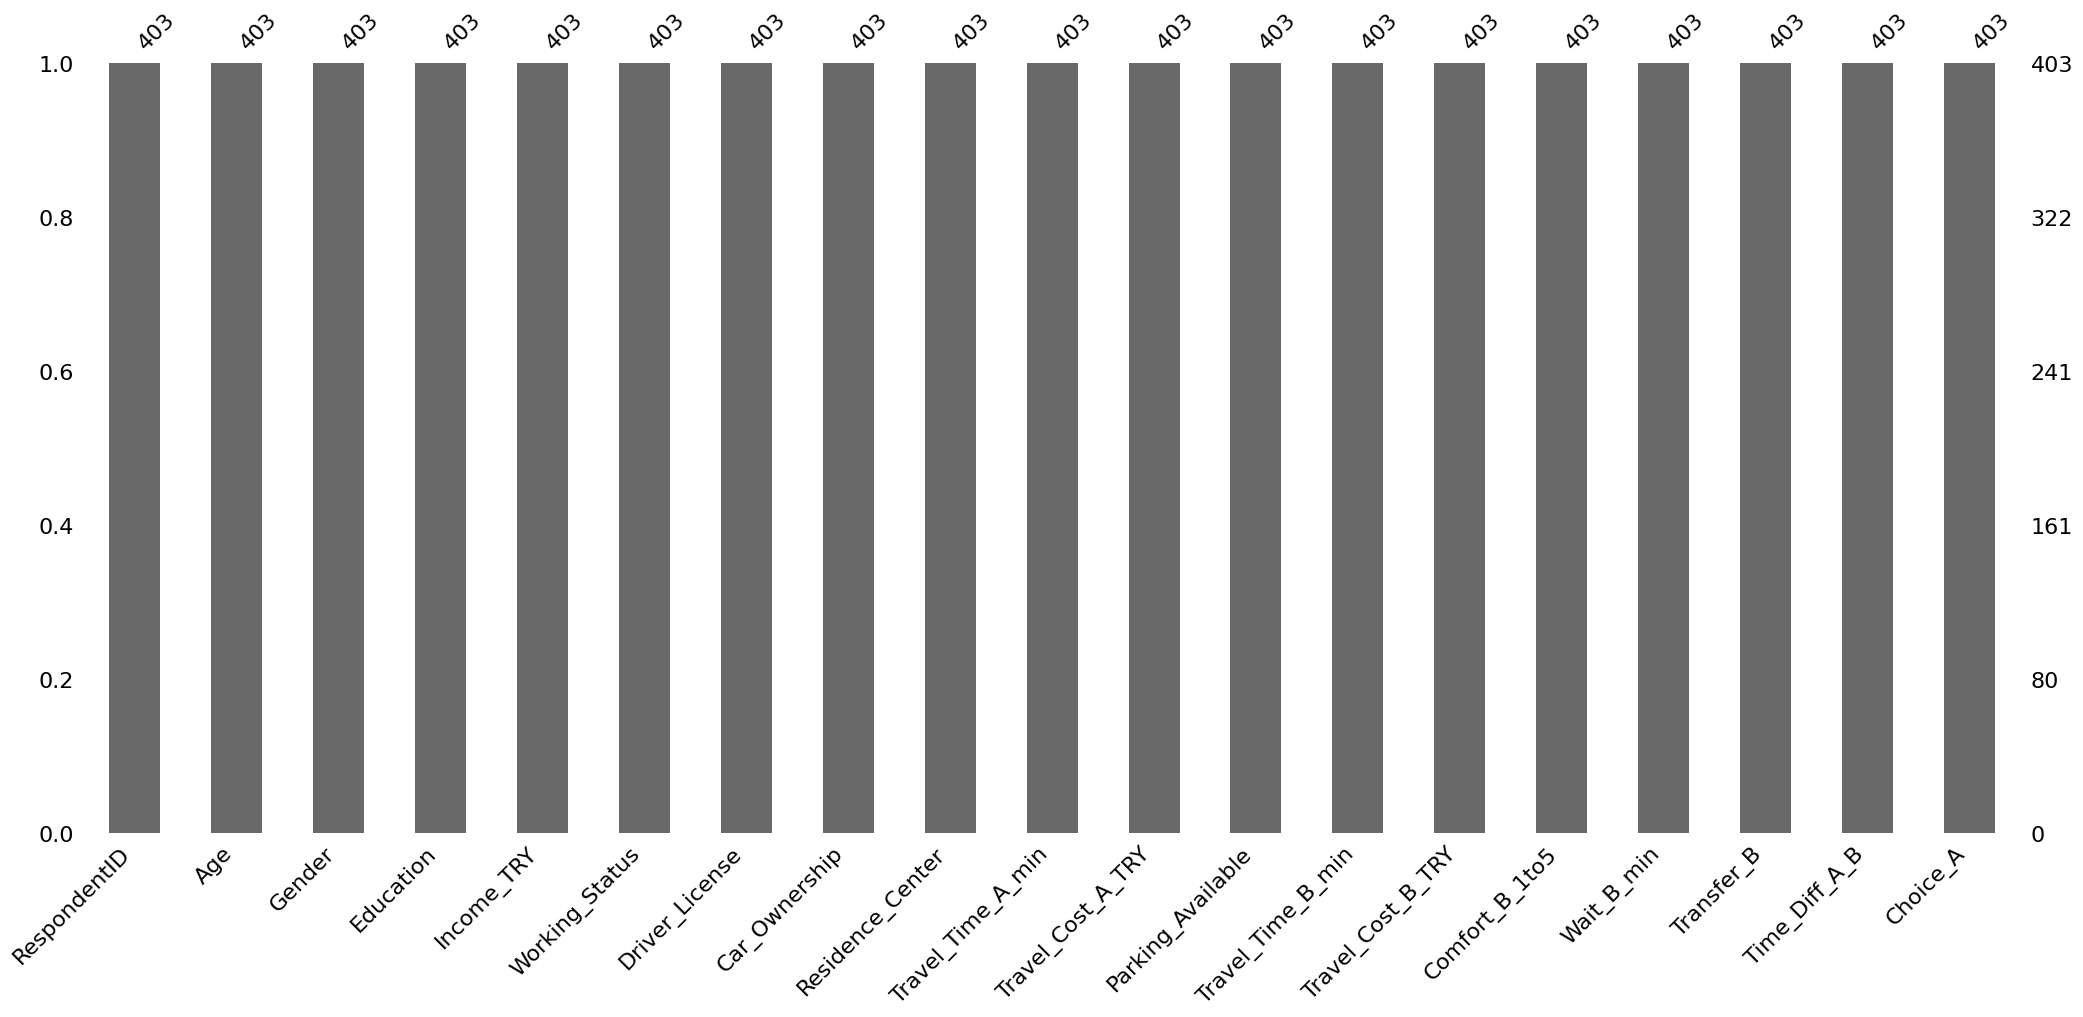

In [ ]:
import missingno as msno
msno.bar(df)

No missing value treatment is required.

In [ ]:
#recoding the education into categories
# copy for observations choosing Mode A
df_a = df.copy()

# Alternative indicator: Mode A
df_a["Mode"] = 1   # 1 = Mode A

# Generic travel variables for Mode A
df_a["Travel_Time"] = df_a["Travel_Time_A_min"]
df_a["Travel_Cost"] = df_a["Travel_Cost_A_TRY"]
df_a["Parking"] = df_a["Parking_Available"]

# PT-related attributes not relevant for Mode A -> set to 0
df_a["Comfort"] = 0
df_a["Wait"] = 0
df_a["Transfer"] = 0

# Choice at alternative level: for A it's exactly Choice_A
df_a["Choice"] = df_a["Choice_A"]

# Choice situation / observation ID (one per respondent)
df_a["Obs_ID"] = df_a["RespondentID"]
df_a.head()


,RespondentID,Age,Gender,Education,Income_TRY,Working_Status,Driver_License,Car_Ownership,Residence_Center,Travel_Time_A_min,...,Choice_A,Mode,Travel_Time,Travel_Cost,Parking,Comfort,Wait,Transfer,Choice,Obs_ID
0,1,18,0,Elementary,40014,FullTime,1,0,1,50,...,0,1,50,79,1,0,0,0,0,1
1,2,69,1,Primary,41301,FullTime,1,0,1,33,...,0,1,33,13,0,0,0,0,0,2
2,3,32,0,HighSchool,20254,Student,0,0,1,10,...,1,1,10,15,0,0,0,0,1,3
3,4,68,1,Primary,84270,Student,1,1,1,51,...,0,1,51,36,0,0,0,0,0,4
4,5,68,0,Elementary,85043,Retired,1,0,0,10,...,1,1,10,66,0,0,0,0,1,5


In [ ]:
# Copy for Mode B
df_b = df.copy()

# Alternative indicator: Mode B
df_b["Mode"] = 0   # 0 = Mode B

# Generic travel variables for Mode B
df_b["Travel_Time"] = df_b["Travel_Time_B_min"]
df_b["Travel_Cost"] = df_b["Travel_Cost_B_TRY"]

# Parking not relevant for PT -> 0
df_b["Parking"] = 0

# PT-specific attributes
df_b["Comfort"] = df_b["Comfort_B_1to5"]
df_b["Wait"] = df_b["Wait_B_min"]
df_b["Transfer"] = df_b["Transfer_B"]

# Choice at alternative level: B chosen if A was not chosen
df_b["Choice"] = 1 - df_b["Choice_A"]

# Same choice situation / observation ID
df_b["Obs_ID"] = df_b["RespondentID"]
df_b.head()

,RespondentID,Age,Gender,Education,Income_TRY,Working_Status,Driver_License,Car_Ownership,Residence_Center,Travel_Time_A_min,...,Choice_A,Mode,Travel_Time,Travel_Cost,Parking,Comfort,Wait,Transfer,Choice,Obs_ID
0,1,18,0,Elementary,40014,FullTime,1,0,1,50,...,0,0,30,45,0,5,0,2,1,1
1,2,69,1,Primary,41301,FullTime,1,0,1,33,...,0,0,15,27,0,4,16,0,1,2
2,3,32,0,HighSchool,20254,Student,0,0,1,10,...,1,0,31,22,0,2,1,0,0,3
3,4,68,1,Primary,84270,Student,1,1,1,51,...,0,0,28,44,0,4,15,1,1,4
4,5,68,0,Elementary,85043,Retired,1,0,0,10,...,1,0,59,33,0,5,6,1,0,5


In [ ]:
df_long = pd.concat([df_a, df_b], ignore_index=True)

# Sort nicely: each Respondent with Mode=0 and Mode=1 together
df_long = df_long.sort_values(["RespondentID", "Mode"]).reset_index(drop=True)

In [ ]:
# Unique row ID for each alternative row
df_long["Row_ID"] = df_long.index + 1

In [ ]:
cols_order = [
    "Row_ID", "Obs_ID", "Mode", "Choice",
    "RespondentID", "Age", "Gender", "Education", "Income_TRY",
    "Working_Status", "Driver_License", "Car_Ownership", "Residence_Center",
    "Travel_Time", "Travel_Cost", "Parking", "Comfort", "Wait", "Transfer",
    "Travel_Time_A_min", "Travel_Cost_A_TRY", "Parking_Available",
    "Travel_Time_B_min", "Travel_Cost_B_TRY", "Comfort_B_1to5",
    "Wait_B_min", "Transfer_B", "Time_Diff_A_B", "Choice_A"
]

df_long = df_long[cols_order]

print(df_long.head(10))

   Row_ID  Obs_ID  Mode  Choice  RespondentID  Age  Gender   Education  \
0       1       1     0       1             1   18       0  Elementary   
1       2       1     1       0             1   18       0  Elementary   
2       3       2     0       1             2   69       1     Primary   
3       4       2     1       0             2   69       1     Primary   
4       5       3     0       0             3   32       0  HighSchool   
5       6       3     1       1             3   32       0  HighSchool   
6       7       4     0       1             4   68       1     Primary   
7       8       4     1       0             4   68       1     Primary   
8       9       5     0       0             5   68       0  Elementary   
9      10       5     1       1             5   68       0  Elementary   

   Income_TRY Working_Status  ...  Travel_Time_A_min  Travel_Cost_A_TRY  \
0       40014       FullTime  ...                 50                 79   
1       40014       FullTime  ...  

# FEATURE ENGINEERING


1.   First, income categorization will be conducted.

In [ ]:
print(df_long.columns.tolist())

['Row_ID', 'Obs_ID', 'Mode', 'Choice', 'RespondentID', 'Age', 'Gender', 'Education', 'Income_TRY', 'Working_Status', 'Driver_License', 'Car_Ownership', 'Residence_Center', 'Travel_Time', 'Travel_Cost', 'Parking', 'Comfort', 'Wait', 'Transfer', 'Travel_Time_A_min', 'Travel_Cost_A_TRY', 'Parking_Available', 'Travel_Time_B_min', 'Travel_Cost_B_TRY', 'Comfort_B_1to5', 'Wait_B_min', 'Transfer_B', 'Time_Diff_A_B', 'Choice_A']


In [ ]:

income_mean = df_long["Income_TRY"].mean()
income_std  = df_long["Income_TRY"].std()

low_thr  = income_mean - income_std
high_thr = income_mean + income_std

df_long["Income_cat"] = pd.cut(
    df_long["Income_TRY"],
    bins=[-np.inf, low_thr, high_thr, np.inf],
    labels=[1, 2, 3]
).astype(int)
df_long['Income_cat'].head()

,Income_cat
0,2
1,2
2,2
3,2
4,1




2.   Categorize the Educuation levels to ordinal variable



In [ ]:
edu_map = {
    "Primary": 1,
    "Elementary": 2,
    "HighSchool": 3,
    "University": 4
}
df_long["Edu_cat"] = df_long["Education"].map(edu_map).astype(int)
df_long['Edu_cat'].head(10)

,Edu_cat
0,2
1,2
2,1
3,1
4,3
5,3
6,1
7,1
8,2
9,2


In [ ]:
work_map = {    "FullTime": 3,
                "PartTime": 2,
                "Student": 1,
                "Retired": 0}

df_long["Work_cat"] = df_long["Working_Status"].map(work_map)
df_long['Work_cat'].head(10)

,Work_cat
0,3
1,3
2,3
3,3
4,1
5,1
6,1
7,1
8,0
9,0


# 3 DERIVED VARIABLES

3.1 Diminishing disutility
As part of the understanding that Public transitwaiting time and travel cost sensitivity is not constant. Additional variables are utilized to introduce this effect in the anlysis

In [ ]:
df_long["ln_Travel_Time"] = np.log(df_long["Travel_Time"])
df_long["ln_Travel_Cost"] = np.log(df_long["Travel_Cost"])

3.2 in order o capture the effect of car ownership and driving license together, a driving ability varaible is created.

In [ ]:
df_long["Driveability"] = ((df_long["Driver_License"] == 1) & (df_long["Car_Ownership"] == 1)).astype(int)

3.3 For understanding the effect of affordability as well as as the income and travel cost a new variable is included.

In [ ]:
df_long["Affordability"] = df_long["Travel_Cost"] / df_long["Income_TRY"]

3.4 Research has shown that perceptin of waiting time differ between men and women while using
pt. Therefore, a new variable that only captures the travel time waiting time of women and accept men's as 0.

In [ ]:
df_long["Female_x_WaitB"] = np.where((df_long["Mode"] == 0) & (df_long["Gender"] == 1), df_long["Wait_B_min"], 0.0)

3.5 working status could also effect the time perception of the individuals considering the differentiation of available time of a student and full time worker. Thereforeworking status adjusted travel time and travel cost is also included

In [ ]:
df_long["lnTime_x_IncomeCat"] = df_long["Income_cat"] * df_long["ln_Travel_Time"]
df_long["lnTime_x_Work"]    = df_long["ln_Travel_Time"] * df_long["Work_cat"]

3.6 lastly another incorporation of perceived time is introduced by combining waiting time, transfers, and travel time all together by scaling them.

In [ ]:
sd_tt = df_long.loc[df_long["Mode"]==0, "Travel_Time"].std()
sd_wait = df_long.loc[df_long["Mode"]==0, "Wait"].std()
sd_tr = df_long.loc[df_long["Mode"]==0, "Transfer"].std()

w_wait = sd_tt / sd_wait if sd_wait > 0 else 0
p_tr   = sd_tt / sd_tr   if sd_tr > 0 else 0

df_long["Perceived_Time"] = np.where(
    df_long["Mode"]==0,
    df_long["Travel_Time"] + w_wait*df_long["Wait"] + p_tr*df_long["Transfer"],
    df_long["Travel_Time"]
)

df_long["ln_Perceived_Time"] = np.log(df_long["Perceived_Time"])

In [ ]:
df_long.to_csv('/content/drive/MyDrive/dataset_concat.csv', index=False)